#ATTENTION MAPS AND HIDDEN STATES VISUALIZATION

In [ ]:
from transformers import SwinConfig, SwinModel

# Initializing a Swin microsoft/swin-tiny-patch4-window7-224 style configuration
configuration = SwinConfig()

# Initializing a model (with random weights) from the microsoft/swin-tiny-patch4-window7-224 style configuration
model = SwinModel(configuration)

# Accessing the model configuration
configuration = model.config

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
    

In [ ]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image", trust_remote_code=True)
image = dataset["test"]["image"][0]

image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

inputs = image_processor(image, return_tensors="pt")
model.config.output_attentions=True
model.config.output_hidden_states=True
with torch.no_grad():
    outputs = model(**inputs)

attentions = outputs.attentions
# logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
# predicted_label = logits.argmax(-1).item()
# print(model.config.id2label[predicted_label])

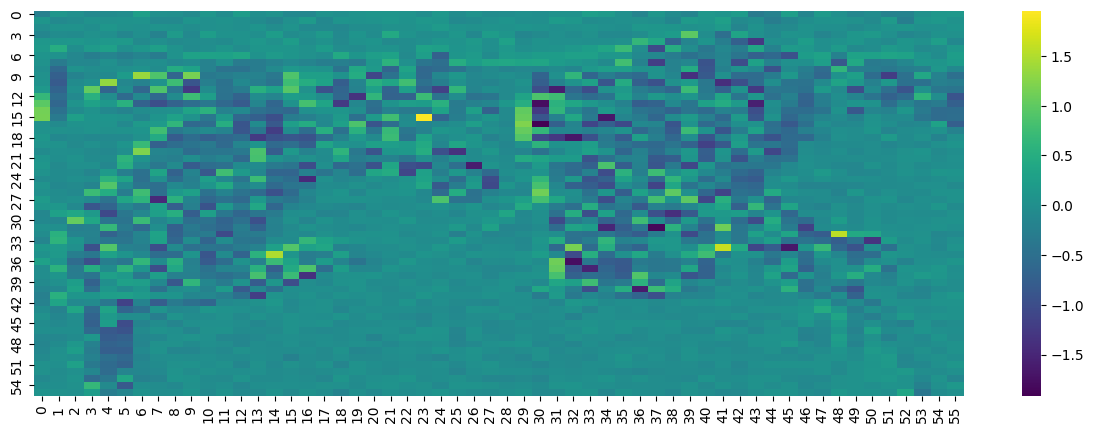

[[-0.24316517  0.11357244  0.01349729 ...  0.0319349   0.13909504
   0.15395676]
 [ 0.10933146 -0.09715404 -0.05005284 ...  0.10462969  0.15507856
   0.04667224]
 [-0.02989381  0.05319747  0.03823108 ...  0.00825233  0.00884037
   0.08689059]
 ...
 [-0.09006987 -0.03163378  0.07987086 ... -0.10461951  0.07334362
  -0.13623533]
 [-0.01400087 -0.01388721  0.02920558 ... -0.22270204  0.02011868
   0.1508563 ]
 [ 0.0750531   0.02903843  0.01923092 ... -0.38632002 -0.0669339
   0.01245179]]


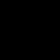

In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab.patches import cv2_imshow
hs = outputs.reshaped_hidden_states
for i, attention in enumerate(hs):
    img = attention[0][-90].numpy()
    plt.figure(figsize=(15, 5))
    sns.heatmap(img, cmap='viridis', cbar=True)
    plt.show()
    print(img)
    cv2_imshow(img)
    cv2.waitKey(0)
    break

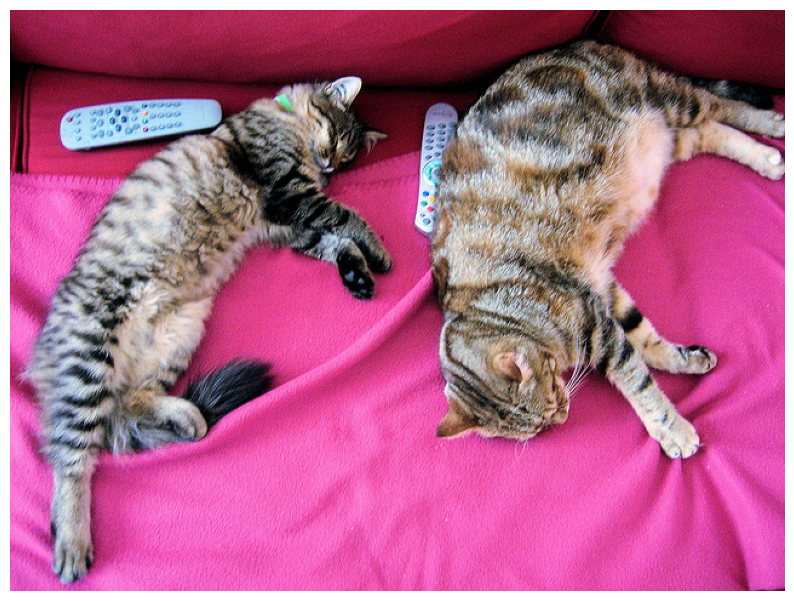

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

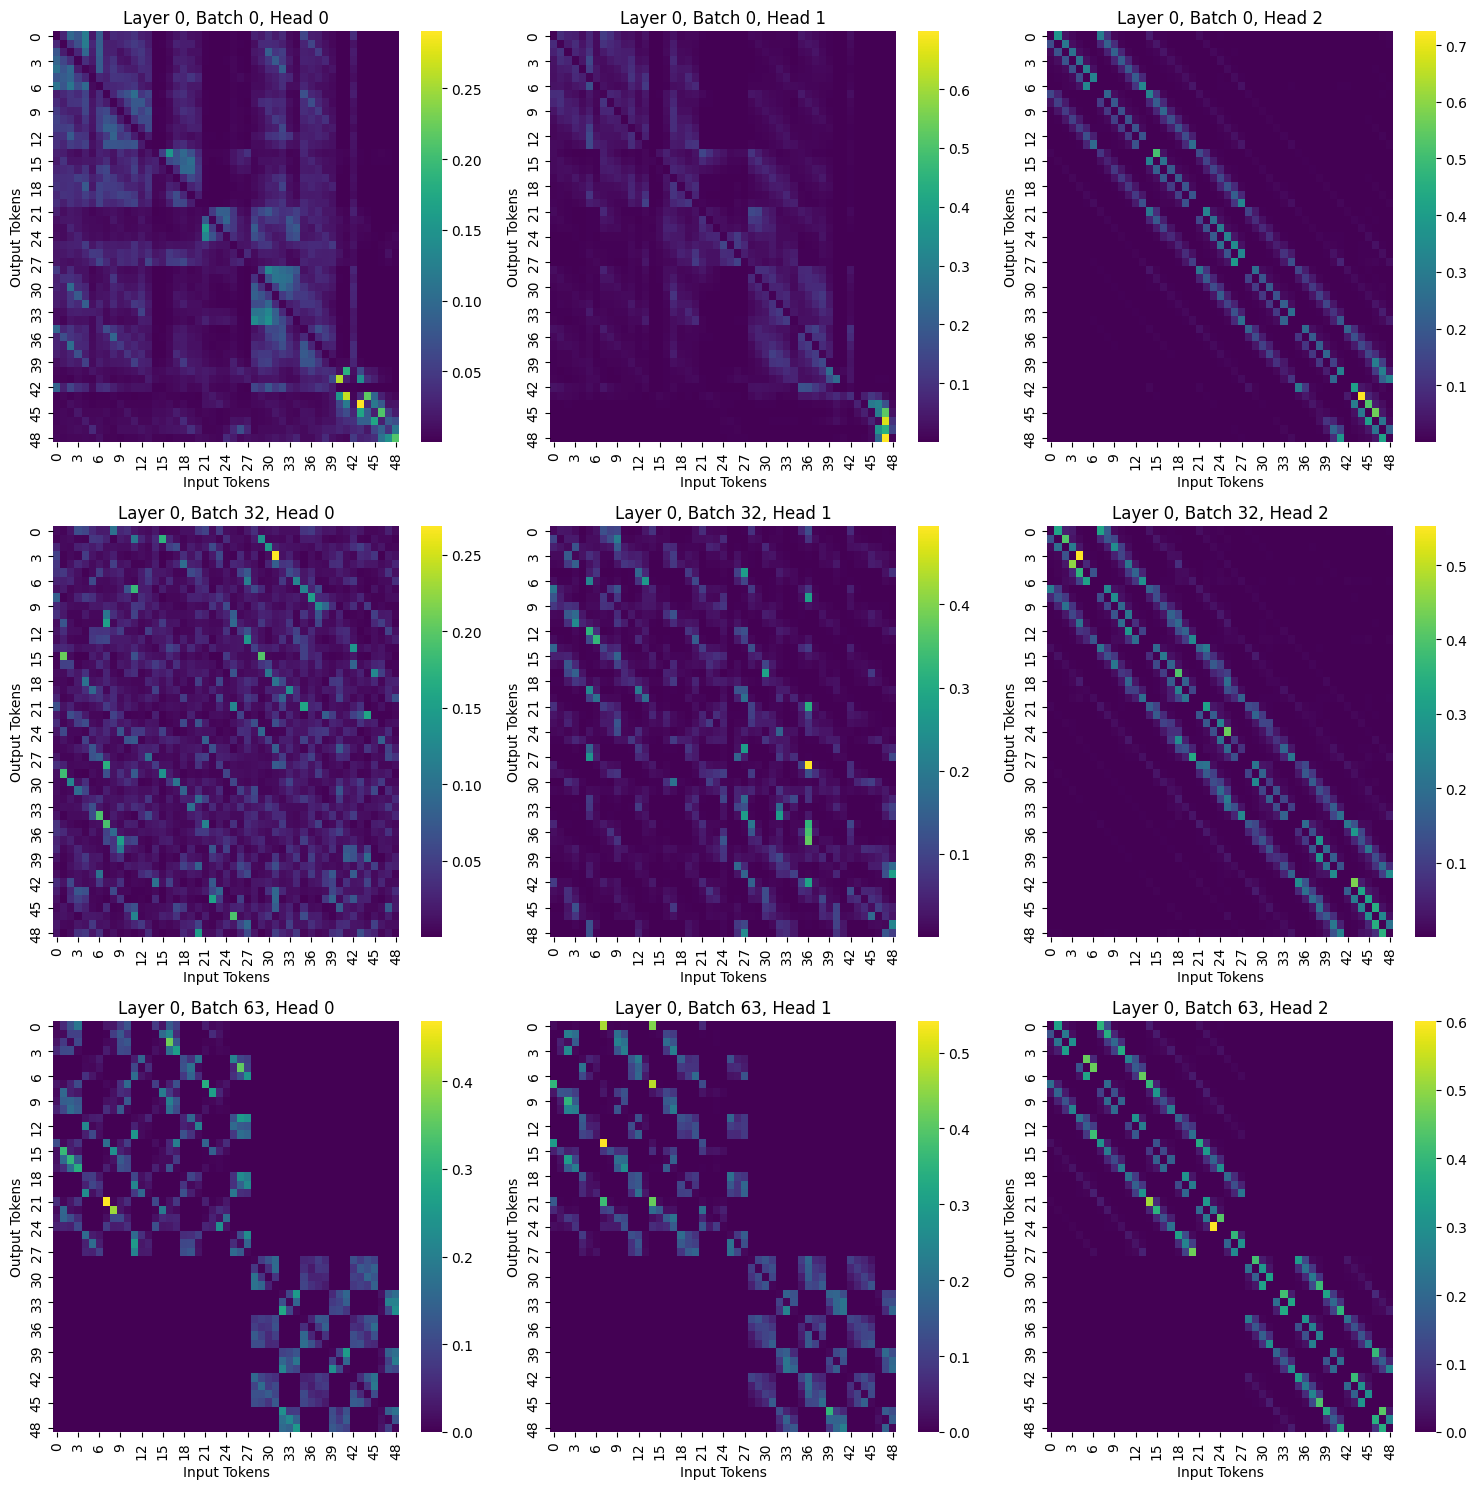

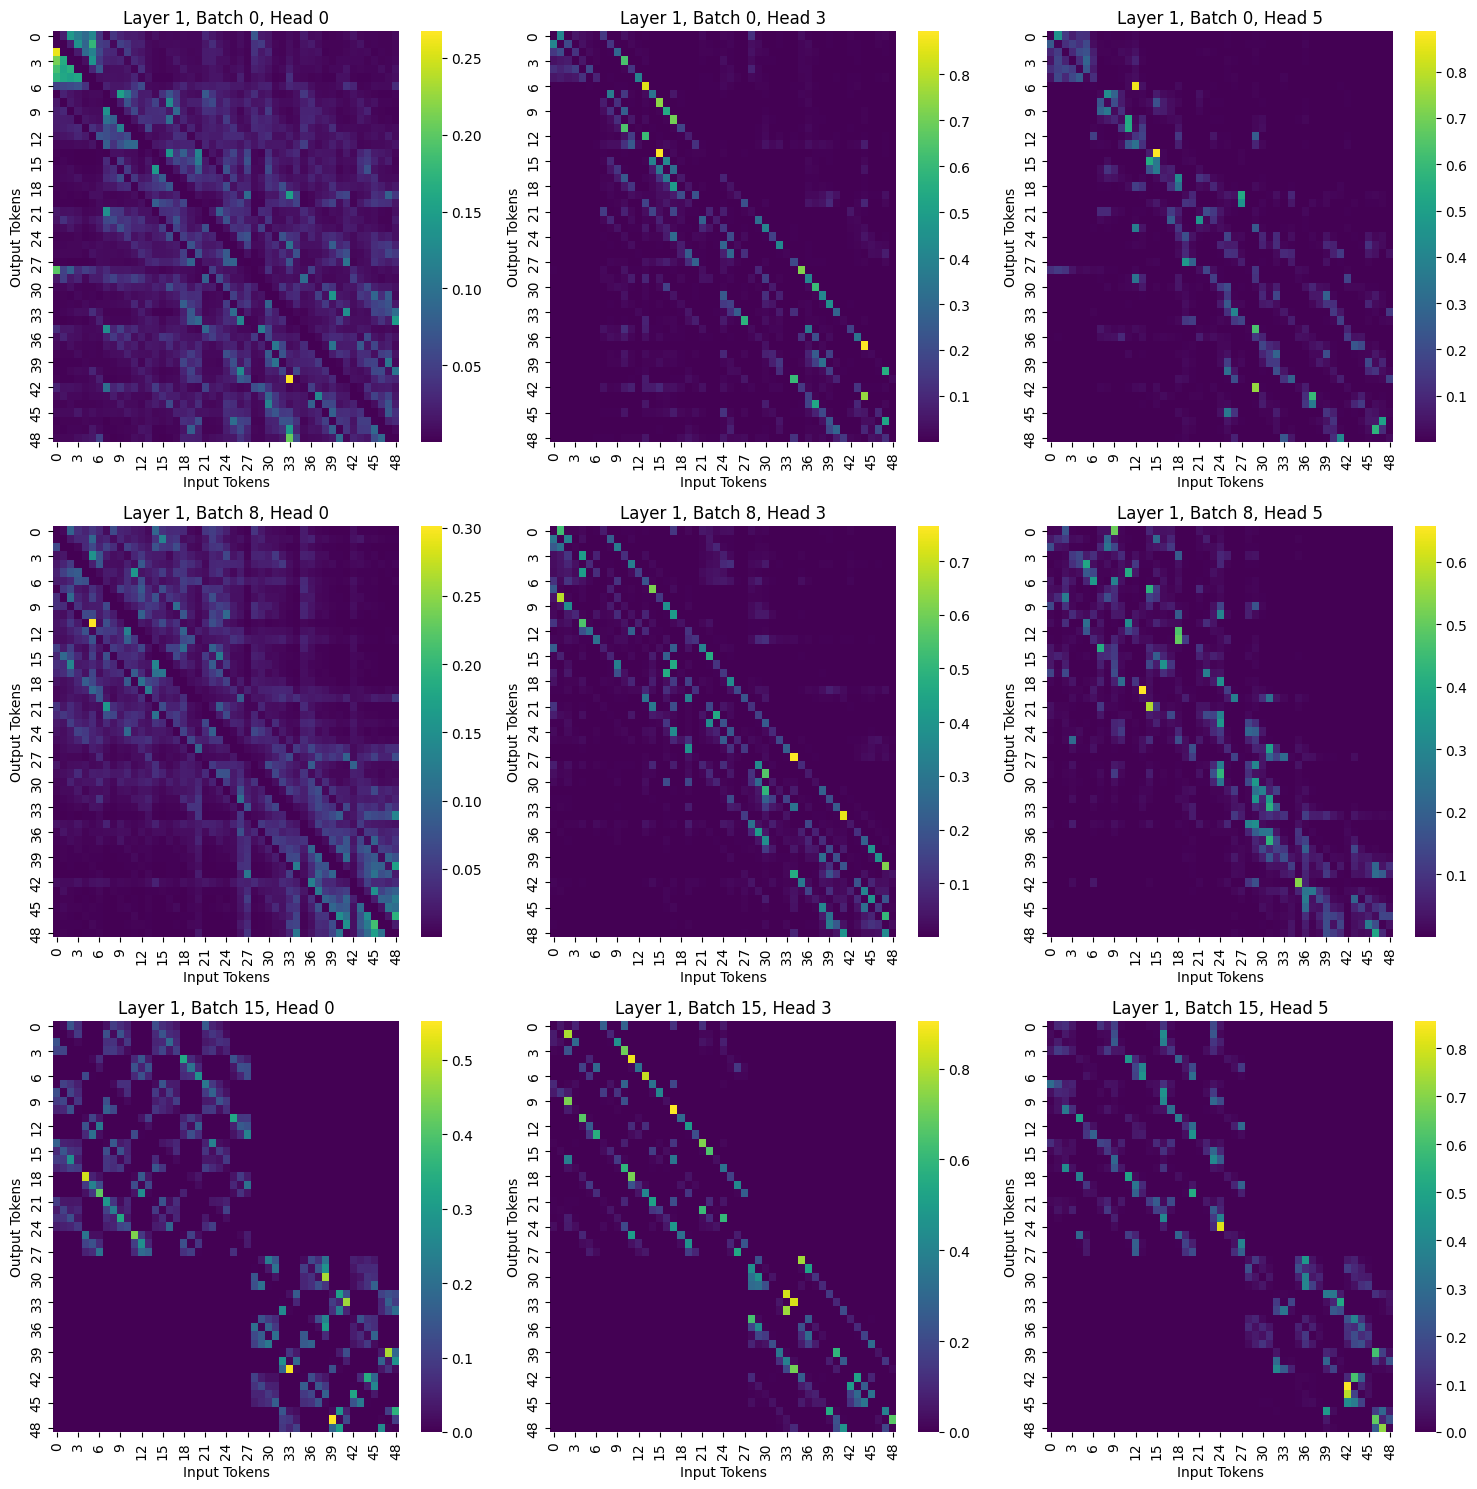

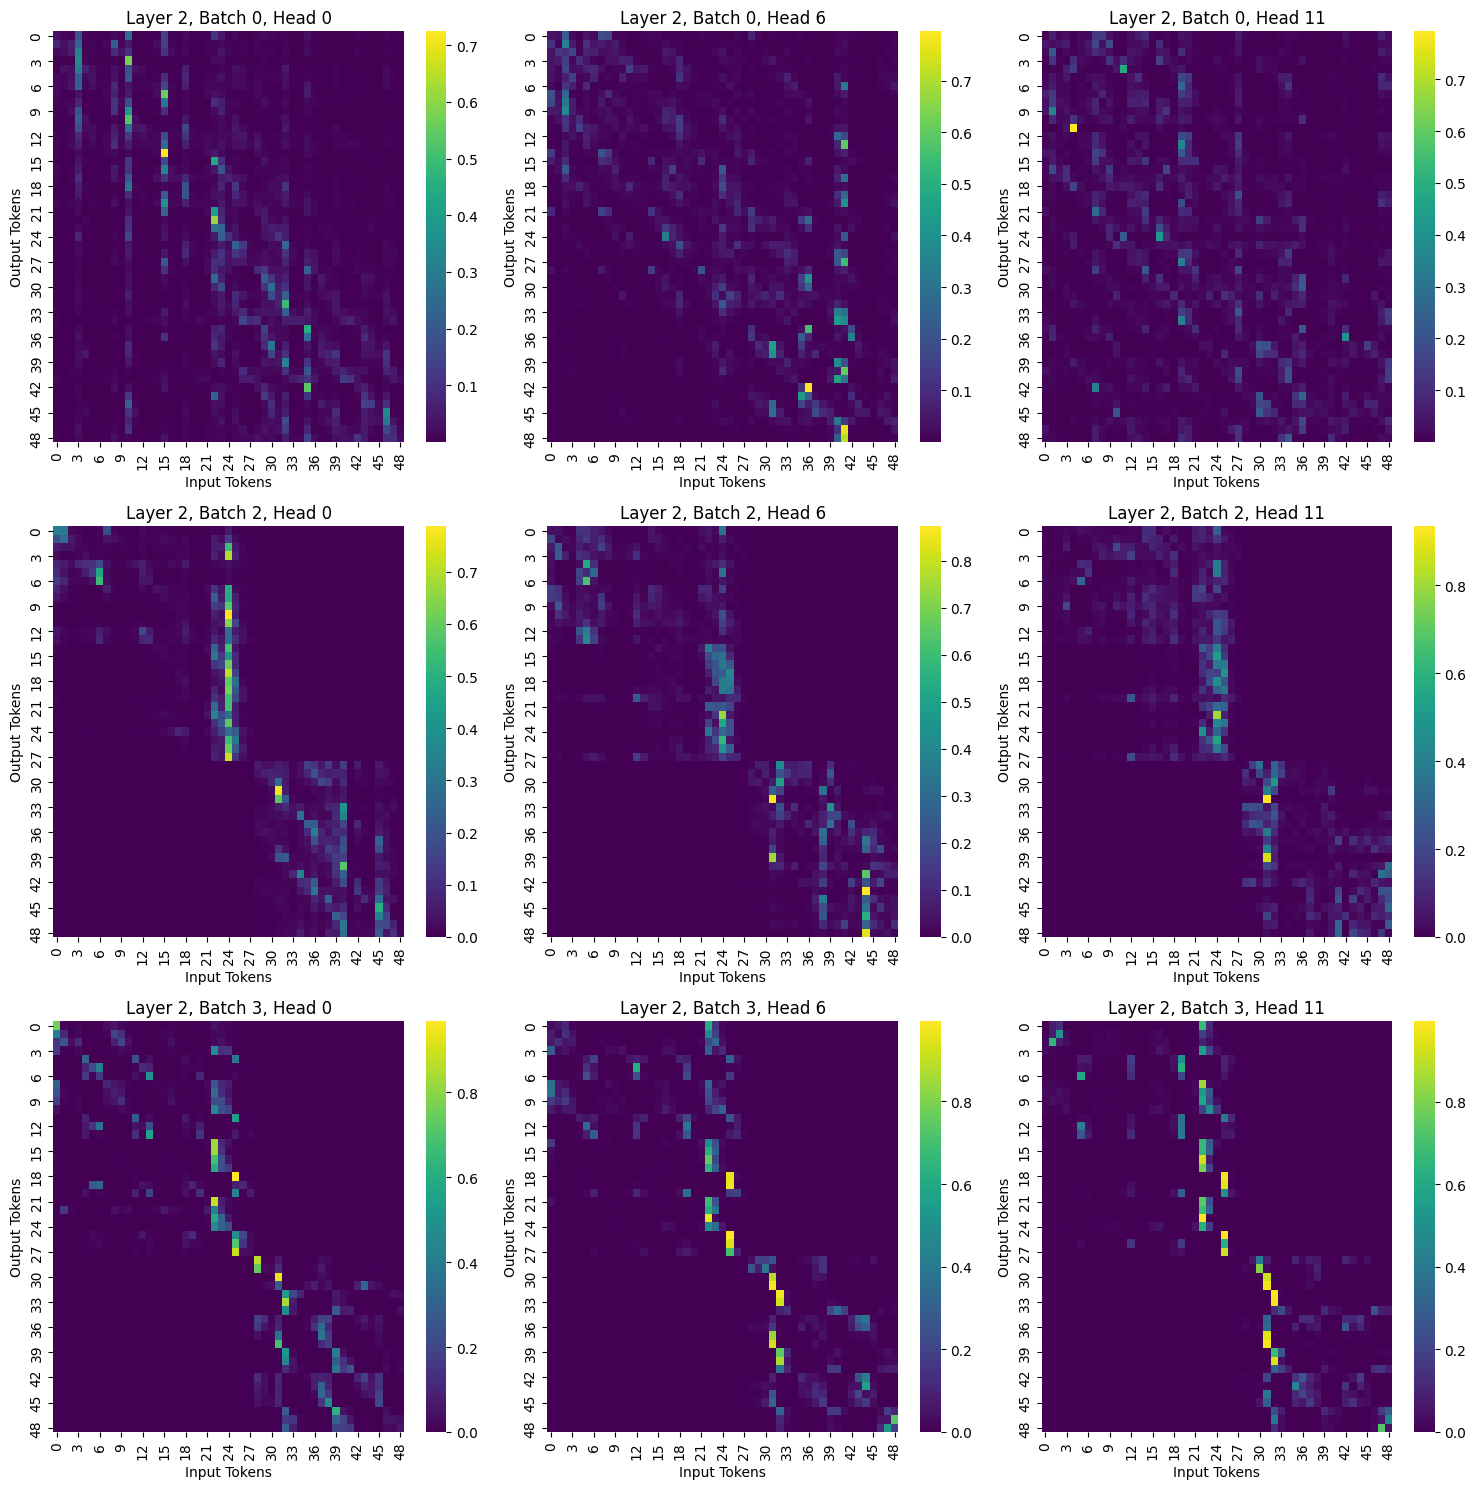

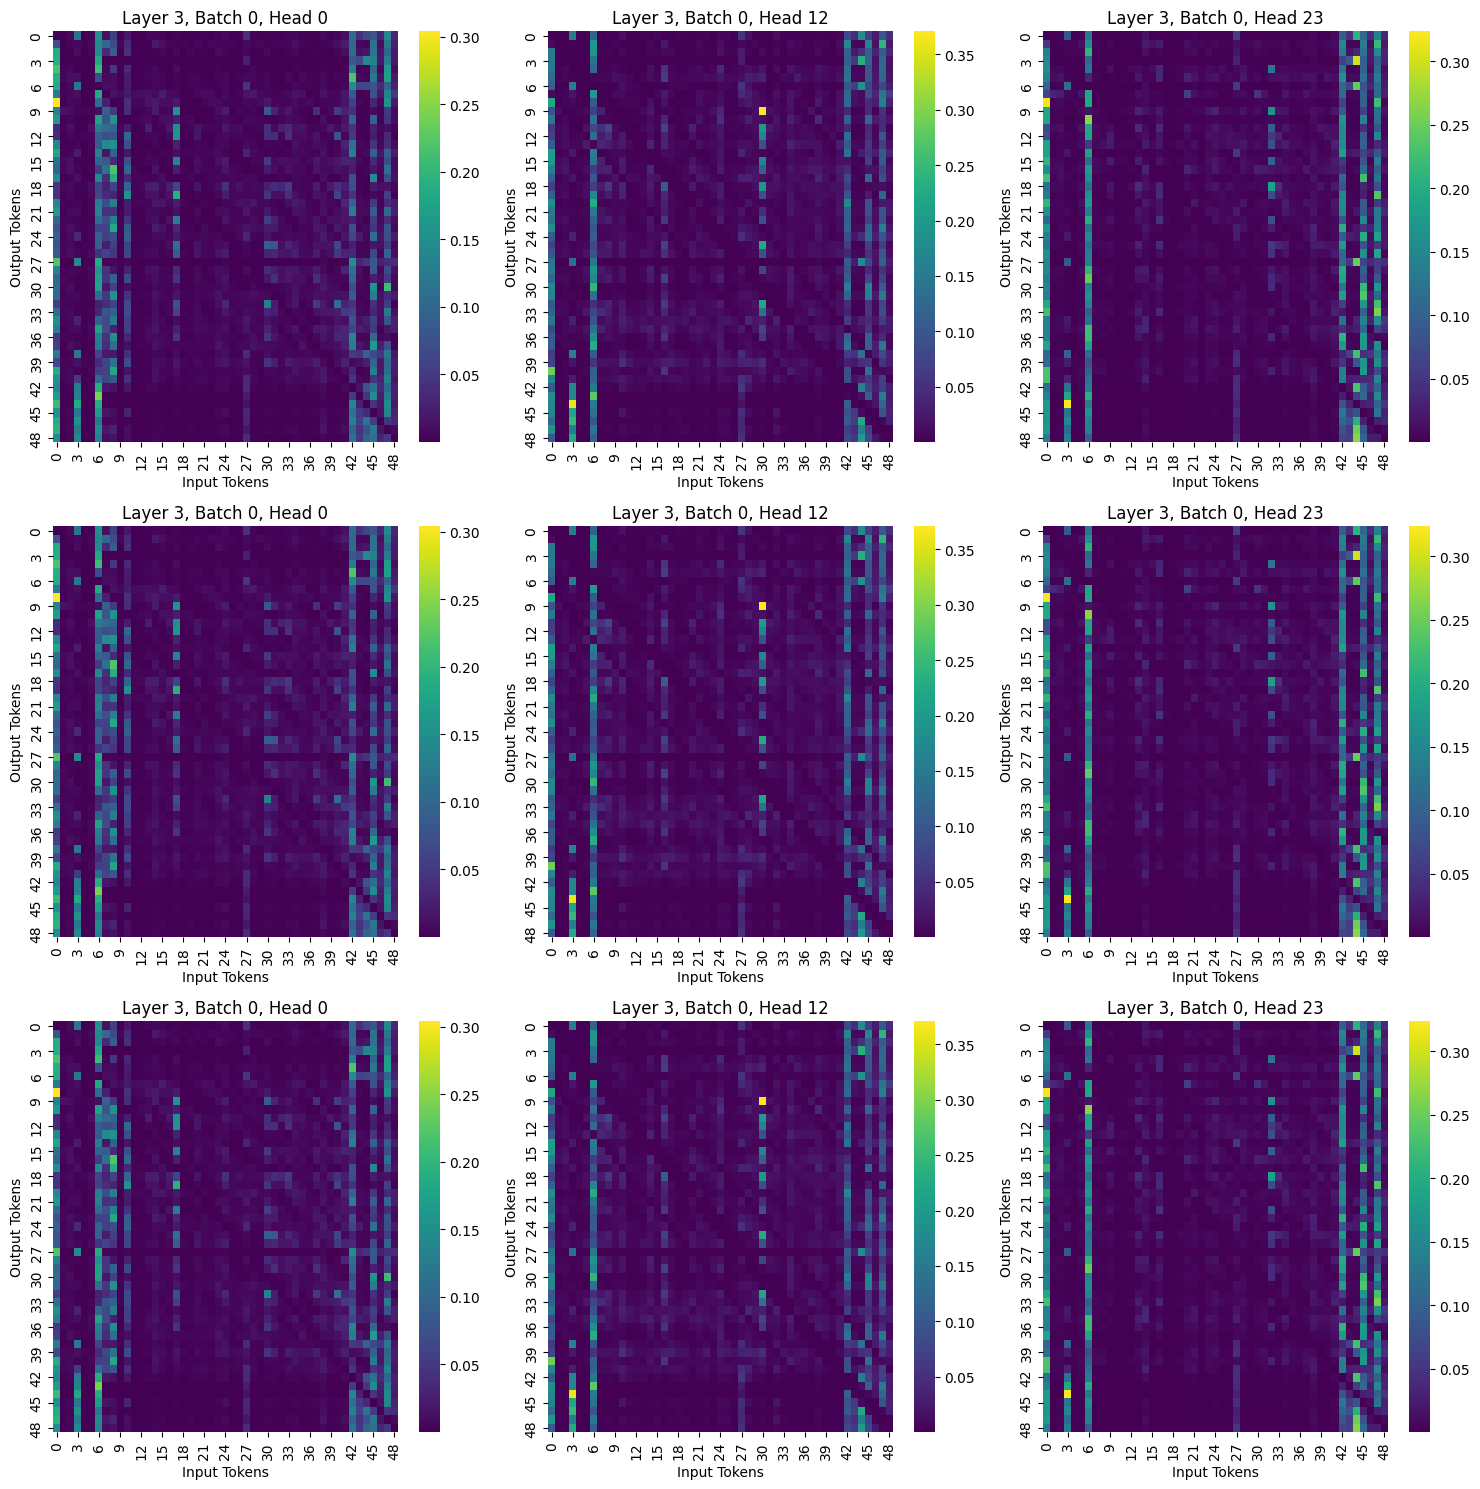

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming 'outputs.attentions' is a list of tensors containing attention maps for each layer.
# Example: outputs.attentions[i] is of shape (batch_size, num_heads, sequence_length, sequence_length).

def visualize_attention(attention, batch_indices, head_indices, layer_num):
    """Visualizes the attention maps for given batch and head indices."""
    num_plots = len(batch_indices) * len(head_indices)
    fig, axes = plt.subplots(len(batch_indices), len(head_indices), figsize=(15, 15))

    for row, batch_idx in enumerate(batch_indices):
        for col, head_idx in enumerate(head_indices):
            attention_map = attention[batch_idx, head_idx].detach().numpy()
            ax = axes[row, col] if num_plots > 1 else axes
            sns.heatmap(attention_map, cmap='viridis', ax=ax)
            ax.set_title(f'Layer {layer_num}, Batch {batch_idx}, Head {head_idx}')
            ax.set_xlabel('Input Tokens')
            ax.set_ylabel('Output Tokens')

    plt.tight_layout()
    plt.show()

# Iterate over each attention layer
for i, attention in enumerate(outputs.attentions):
    batch_size, num_heads, sequence_length, _ = attention.shape

    # Define indices to visualize: first, middle, last
    batch_indices = [0, batch_size // 2, batch_size - 1]
    head_indices = [0, num_heads // 2, num_heads - 1]

    # Visualize the attention maps
    visualize_attention(attention, batch_indices, head_indices, i)


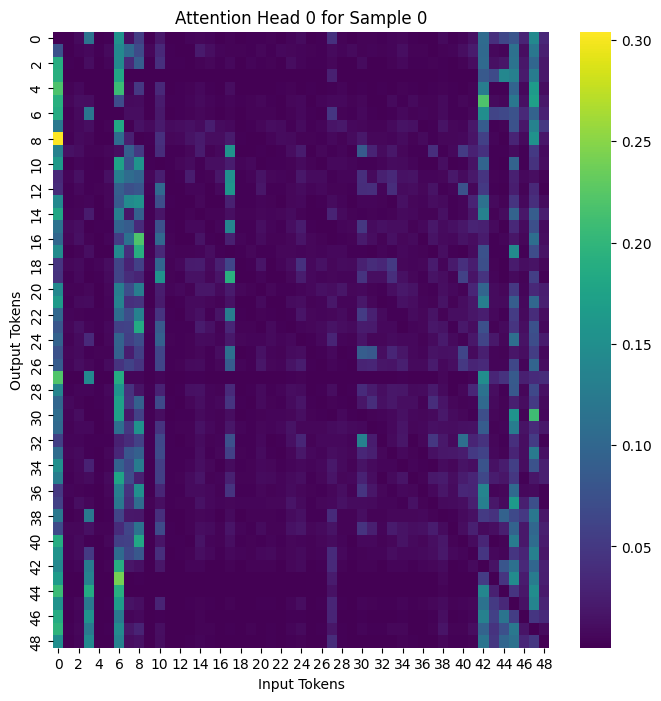

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Example attention output from one layer, with a shape like [batch_size, num_heads, sequence_length, sequence_length]
# Here, assuming 'attention_layer' is your attention output
# For example, attention_layer = torch.Size([64, 3, 49, 49])
for i, attention in enumerate(outputs.attentions):
    print(f"Attention layer {i} shape: {attention.shape}")
# Choose a sample from the batch, a specific head, and the desired layer
batch_index = 0
head_index = 0
attention_map = attention[batch_index, head_index].detach().numpy()

# Visualize the attention map
plt.figure(figsize=(8, 8))
sns.heatmap(attention_map, cmap='viridis')
plt.title(f'Attention Head {head_index} for Sample {batch_index}')
plt.xlabel('Input Tokens')
plt.ylabel('Output Tokens')
plt.show()


In [ ]:
print(attentions)

(tensor([[[[1.8673e-03, 2.8597e-02, 9.6029e-02,  ..., 4.7419e-05,
           8.2277e-05, 5.8065e-05],
          [3.1945e-02, 1.8383e-03, 4.1695e-02,  ..., 6.7606e-05,
           1.0695e-04, 6.1501e-05],
          [7.7074e-02, 2.1919e-02, 2.4782e-03,  ..., 9.2502e-05,
           9.7267e-05, 7.6263e-05],
          ...,
          [3.4741e-03, 5.8015e-03, 6.9009e-03,  ..., 2.4652e-02,
           7.9636e-02, 6.7458e-02],
          [5.0889e-03, 5.4833e-03, 7.8629e-03,  ..., 8.9483e-02,
           4.1678e-02, 1.1355e-01],
          [6.5090e-03, 3.9574e-03, 4.6618e-03,  ..., 1.0906e-01,
           1.4583e-01, 2.1102e-01]],

         [[3.8032e-03, 8.9145e-02, 6.4846e-02,  ..., 5.7234e-08,
           3.6040e-07, 3.1697e-08],
          [8.2479e-02, 4.6245e-03, 5.2610e-02,  ..., 8.4184e-08,
           3.6664e-07, 2.7135e-08],
          [6.4374e-02, 9.9748e-02, 2.7199e-03,  ..., 1.1832e-07,
           4.0043e-07, 2.4711e-08],
          ...,
          [3.1393e-04, 5.8291e-04, 7.2090e-04,  ..., 1.655

In [ ]:
model.config.output_attentions=True

#INFERENCING ON TRANSFORMATIONS

In [ ]:
%cd /content
!unzip /content/drive/MyDrive/Image_Val_new.zip

Streaming output truncated to the last 5000 lines.
  inflating: Image_Val_new/ILSVRC2012_val_00033394.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033397.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033398.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033408.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033412.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033424.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033428.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033429.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033430.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033432.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033433.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033434.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033435.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033436.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033440.JPEG  
  inflating: Image_Val_new/ILSVRC2012_val_00033449.JPEG  
  inflating: Image_Va

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

# import timm


In [ ]:
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from torchvision.transforms import v2
import re

class ImageNetValidation(Dataset):
    def __init__(self, root_dir, ground_truth_file, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.img_names = sorted(os.listdir(root_dir))

        # Load ground truth labels
        with open(ground_truth_file, 'r') as f:
            self.labels = [int(line.strip()) for line in f]

    def _load_image(self, path):
    # try:
        im = Image.open(path)
        im = im.resize((224,224))
        # except:
        #     print("ERROR IMG LOADED: ", path)
        #     random_img = np.random.rand(224, 224, 3) * 255
        #     im = Image.fromarray(np.uint8(random_img))
        return im

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.img_names[idx])
            # Regular expression pattern to match the numeric segment
        pattern = r'_0*(\d+)\.'

        # Search for the pattern in the filename
        match = re.search(pattern, img_path)

        if match:
            # Extract and return the captured number
            index = int(match.group(1))


        image = self._load_image(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        #print("index:",index,"label:",self.labels[index - 1])

        return image, torch.tensor(self.labels[index - 1])

    def __len__(self):
        return len(self.img_names)


transforms = v2.Compose([
    v2.ToImage(),  # Convert to tensor, only needed if you had a PIL image
    v2.ToDtype(torch.uint8, scale=True),  # optional, most input are already uint8 at this point
    v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create the dataset
val_dataset = ImageNetValidation(
    root_dir='/content/Image_Val_new',
    ground_truth_file='/content/mapped_values.txt',
    transform=transforms
)

# Create the DataLoader
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
batch_size = 1
sampler = torch.utils.data.SequentialSampler(val_dataset)
val_loader = torch.utils.data.DataLoader(
        val_dataset, sampler=sampler,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        pin_memory=True,
        drop_last=False
)

In [ ]:
from torchvision.models import swin_b, Swin_B_Weights
model = swin_b(weights=Swin_B_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/swin_b-68c6b09e.pth" to /root/.cache/torch/hub/checkpoints/swin_b-68c6b09e.pth
100%|██████████| 335M/335M [00:03<00:00, 96.5MB/s]


In [ ]:
mkdir /content/res

In [ ]:
##CODE FOR LOGGING
def reduce_tensor(tensor):
    rt = tensor.clone()
    dist.all_reduce(rt, op=dist.ReduceOp.SUM)
    rt /= dist.get_world_size()
    return rt

import os
import sys
import logging
import functools
from termcolor import colored


@functools.lru_cache()
def create_logger(output_dir, dist_rank=0, name=''):
    # create logger
    logger = logging.getLogger(name)
    logger.setLevel(logging.DEBUG)
    logger.propagate = False

    # create formatter
    fmt = '[%(asctime)s %(name)s] (%(filename)s %(lineno)d): %(levelname)s %(message)s'
    color_fmt = colored('[%(asctime)s %(name)s]', 'green') + \
                colored('(%(filename)s %(lineno)d)', 'yellow') + ': %(levelname)s %(message)s'

    # create console handlers for master process
    if dist_rank == 0:
        console_handler = logging.StreamHandler(sys.stdout)
        console_handler.setLevel(logging.DEBUG)
        console_handler.setFormatter(
            logging.Formatter(fmt=color_fmt, datefmt='%Y-%m-%d %H:%M:%S'))
        logger.addHandler(console_handler)

    # create file handlers
    file_handler = logging.FileHandler(os.path.join(output_dir, f'log_rank_ImgValOrg.txt'), mode='a')
    file_handler.setLevel(logging.DEBUG)
    file_handler.setFormatter(logging.Formatter(fmt=fmt, datefmt='%Y-%m-%d %H:%M:%S'))
    logger.addHandler(file_handler)

    return logger

logger = create_logger(output_dir="/content/res", name="b")

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
##CODE FOR VALIDATION/EVALUATION
import torch
import time
from timm.utils import accuracy, AverageMeter
import torch.distributed as dist

def reduce_tensor(tensor):
    rt = tensor.clone()
    dist.all_reduce(rt, op=dist.ReduceOp.SUM)
    rt /= dist.get_world_size()
    return rt

@torch.no_grad()
def validate(model, data_loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()

    res_model = []
    res_tar = []
    dict = {}

    batch_time = AverageMeter()
    loss_meter = AverageMeter()
    acc1_meter = AverageMeter()
    acc5_meter = AverageMeter()

    end = time.time()
    for idx, (images, target) in enumerate(data_loader):
        images = images.cuda(non_blocking=True)
        target = target.cuda(non_blocking=True)
        print(idx)
        # print(images)
        # print(target)
        # break

        #compute output
        with torch.cuda.amp.autocast(enabled=False):
            output = model(images)

        res_model.append(np.argmax(output.cpu().detach().numpy(), axis=1))
        res_tar.append(target.cpu().detach().numpy())

        # print(res_model)
        # print(res_tar)

        # measure accuracy and record loss
        loss = criterion(output, target)
        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        t = target.cpu().detach().numpy()
        # print(t, target, acc1.item())
        t = int(t[0])
        if t in dict:
          dict[t].append(acc1.item())
        else:
          dict[t] = [acc1.item()]
        # print(dict)

        # print(acc1, acc5)
        print(acc1, acc5)

        # acc1 = reduce_tensor(acc1)
        # acc5 = reduce_tensor(acc5)
        # loss = reduce_tensor(loss)

        # print(acc1, acc5)

        loss_meter.update(loss.item(), target.size(0))
        acc1_meter.update(acc1.item(), target.size(0))
        acc5_meter.update(acc5.item(), target.size(0))

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if idx % 2 == 0:
            memory_used = torch.cuda.max_memory_allocated() / (1024.0 * 1024.0)
            logger.info(
                f'Test: [{idx}/{len(data_loader)}]\t'
                f'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                f'Loss {loss_meter.val:.4f} ({loss_meter.avg:.4f})\t'
                f'Acc@1 {acc1_meter.val:.3f} ({acc1_meter.avg:.3f})\t'
                f'Acc@5 {acc5_meter.val:.3f} ({acc5_meter.avg:.3f})\t'
                f'Mem {memory_used:.0f}MB')
    logger.info(f' * Acc@1 {acc1_meter.avg:.3f} Acc@5 {acc5_meter.avg:.3f}')
    with open("ImgValOrg_best_worst_accuracy.json", 'w') as new_file:
        json.dump(dict, new_file, indent=4)
    return acc1_meter.avg, acc5_meter.avg, loss_meter.avg, res_model, res_tar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import json
device = torch.device("cuda")
result = validate(model.to(device), val_loader)

Streaming output truncated to the last 5000 lines.
13890
tensor(100., device='cuda:0') tensor(100., device='cuda:0')
[2024-07-31 23:19:51 b](<ipython-input-36-a6200b143967> 77): INFO Test: [13890/15000]	Time 0.073 (0.069)	Loss 0.0816 (0.7723)	Acc@1 100.000 (82.593)	Acc@5 100.000 (96.149)	Mem 383MB
[2024-07-31 23:19:51 b](<ipython-input-36-a6200b143967> 77): INFO Test: [13890/15000]	Time 0.073 (0.069)	Loss 0.0816 (0.7723)	Acc@1 100.000 (82.593)	Acc@5 100.000 (96.149)	Mem 383MB
[2024-07-31 23:19:51 b](<ipython-input-36-a6200b143967> 77): INFO Test: [13890/15000]	Time 0.073 (0.069)	Loss 0.0816 (0.7723)	Acc@1 100.000 (82.593)	Acc@5 100.000 (96.149)	Mem 383MB
[2024-07-31 23:19:51 b](<ipython-input-36-a6200b143967> 77): INFO Test: [13890/15000]	Time 0.073 (0.069)	Loss 0.0816 (0.7723)	Acc@1 100.000 (82.593)	Acc@5 100.000 (96.149)	Mem 383MB
[2024-07-31 23:19:51 b](<ipython-input-36-a6200b143967> 77): INFO Test: [13890/15000]	Time 0.073 (0.069)	Loss 0.0816 (0.7723)	Acc@1 100.000 (82.593)	Acc@5 